# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


MAIGNAN Alexandre / CLAICH Octave

## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E1_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataframe= pd.read_csv("./E1_Efficiency_Obs.csv",sep=',')

In [3]:
dataframe.head()


,Brand,Concentration,Efficiency
0,Brand_1,3.9479,3.2224
1,Brand_1,1.7838,1.5127
2,Brand_1,7.4415,4.3736
3,Brand_1,8.5625,5.2151
4,Brand_1,9.8002,5.4256


Text(0.5, 1.0, 'Effet de la concentration du produit sur le rendement du moteur')

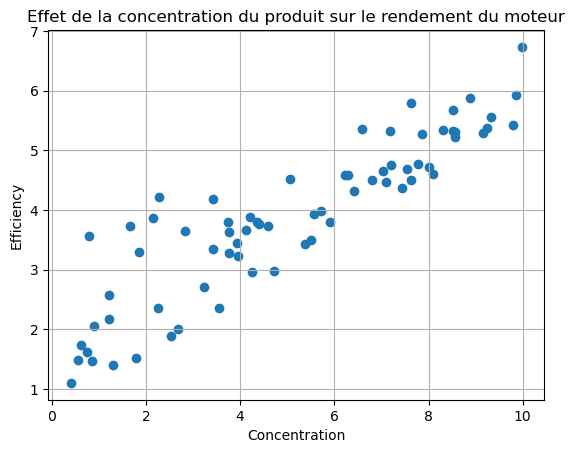

In [4]:
plt.scatter(dataframe['Concentration'], dataframe['Efficiency'])
plt.xlabel("Concentration")
plt.ylabel("Efficiency")
plt.grid()
plt.title("Effet de la concentration du produit sur le rendement du moteur")

Text(0.5, 1.0, 'Comparaison du rendement en fonction de la concentration pour les deux marques')

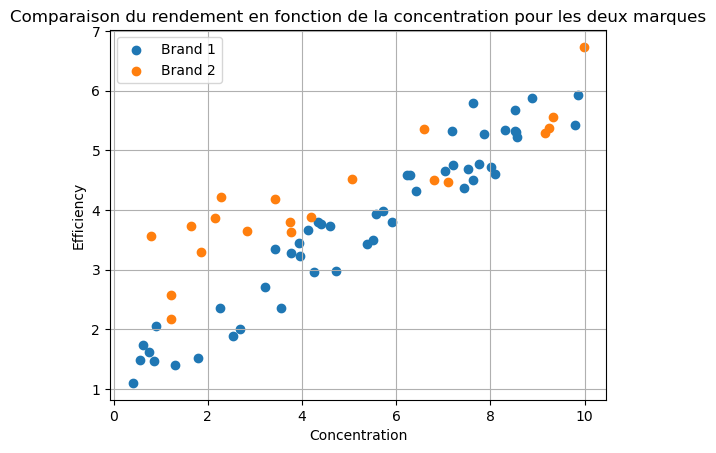

In [5]:
df_brand1 = dataframe[dataframe['Brand'] == 'Brand_1']
df_brand2 = dataframe[dataframe['Brand'] == 'Brand_2']
plt.scatter(df_brand1['Concentration'],df_brand1['Efficiency'], label='Brand 1')
plt.xlabel("Concentration")
plt.ylabel("Efficiency")
plt.grid()

plt.scatter(df_brand2['Concentration'],df_brand2['Efficiency'], label='Brand 2')
plt.xlabel("Concentration")
plt.ylabel("Efficiency")

plt.legend()
plt.title("Comparaison du rendement en fonction de la concentration pour les deux marques")

Médiane de la marque Brand_1 : 5.93
Médiane de la marque Brand_2 : 2.18


Text(0, 0.5, 'Efficiency')

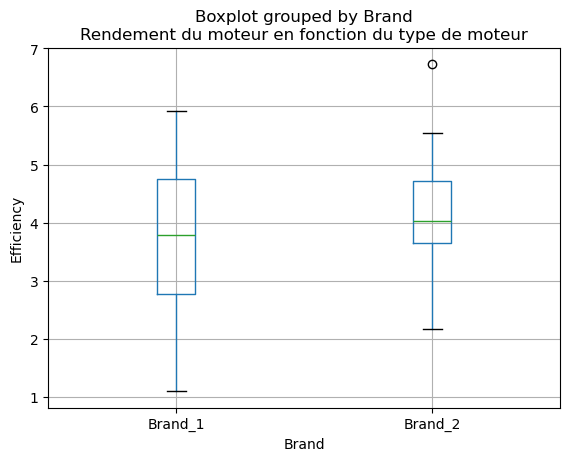

In [6]:
box = dataframe.boxplot(column='Efficiency', by='Brand')
# Afficher les valeurs des médianes
for i, median_line in enumerate(box.lines[4::6]):  # pandas crée 6 lignes par boîte, la 5ème est la médiane
    median_value = median_line.get_ydata()[0]
    brand = dataframe["Brand"].unique()[i]
    print(f"Médiane de la marque {brand} : {median_value:.2f}")
    
plt.title("Rendement du moteur en fonction du type de moteur")
plt.ylabel("Efficiency")

<span style="color:lightblue">
En observant les données, on s'aperçoit que la présence du produit a bien un impact sur le rendement du moteur. En effet, plus la concentration en produit augmente, plus le rendement augmente également.  
Ensuite, en comparant les deux types de moteurs, on remarque que les données de la Brand_1 ont une amplitude plus large que pour la Brand_2 en termes de rendement, de plus en traçant le rendement marque par marque, on peut estimer que la droite de régression dans le cas de la Brand_1 aura une pente plus importante que dans le cas de la Brand_2.</span>

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

<span style="color:lightblue">
On va procéder à une régression linéaire pour approcher le rendement comme une fonction affine de la concentration.  
On pourra en effectuer une sur l'ensemble des données, puis deux en distinguant la marque du moteur, afin de voir si l'impact de la concentration diffère entre les deux.  
On pourra alors regarder les coefficients obtenus, qui nous permettront de comparer les impacts de la concentration dans les différents cas.  
On fera également un test d'hypothèse, pour vérifier que les coefficients sont bien différents. </span>

In [7]:
x = np.array(dataframe['Concentration']).reshape(-1,1)
y = np.array(dataframe['Efficiency']).reshape(-1,1)
brand = dataframe['Brand']

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

print(f"Ordonnée à l'origine de la droite de régression : {lr.intercept_}")
print(f"Pente de la droite de régression : {lr.coef_}")


Ordonnée à l'origine de la droite de régression : [1.74942932]
Pente de la droite de régression : [[0.41872444]]


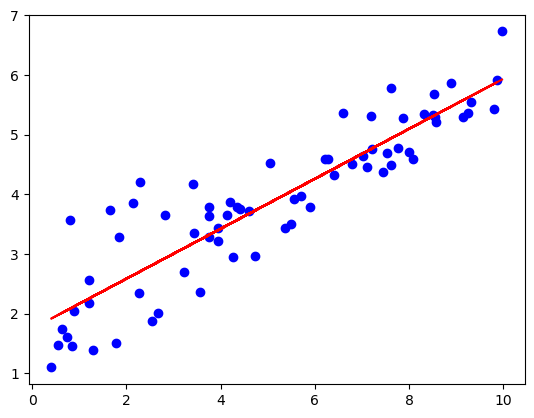

In [9]:
y_pred = lr.predict(x)
plt.scatter(x, y, color='blue', label='Données')

plt.plot(x, y_pred, color='red', label='Régression linéaire')

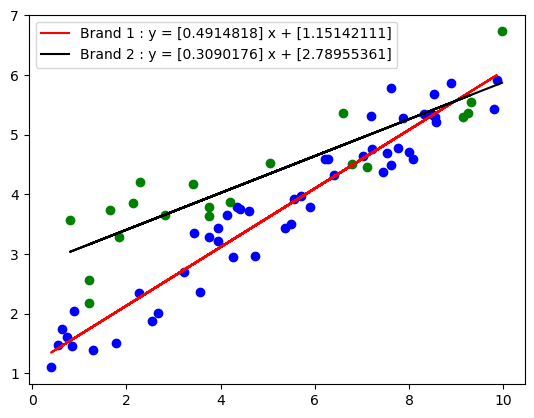

In [10]:
x_brand1 = np.array(df_brand1['Concentration']).reshape(-1,1)
y_brand1 = np.array(df_brand1['Efficiency']).reshape(-1,1)

lr_brand1 = LinearRegression()
lr_brand1.fit(x_brand1, y_brand1)

y_pred_brand1 = lr_brand1.predict(x_brand1)
plt.scatter(x_brand1, y_brand1, color='blue')

plt.plot(x_brand1, y_pred_brand1, color='red', label=f"Brand 1 : y = {lr_brand1.coef_[0]} x + {lr_brand1.intercept_}")

x_brand2 = np.array(df_brand2['Concentration']).reshape(-1,1)
y_brand2 = np.array(df_brand2['Efficiency']).reshape(-1,1)

lr_brand2 = LinearRegression()
lr_brand2.fit(x_brand2, y_brand2)

y_pred_brand2 = lr_brand2.predict(x_brand2)
plt.scatter(x_brand2, y_brand2, color='green')

plt.plot(x_brand2, y_pred_brand2, color='black', label=f"Brand 2 : y = {lr_brand2.coef_[0]} x + {lr_brand2.intercept_}")
plt.legend()

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [11]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

X = pd.read_csv('./E2_sensor_vals.csv', sep=';', decimal = '.')

Y = pd.read_csv('./E2_stress_vals.csv', sep=';', decimal = '.')

X.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17
0,10.8,7.1,4.10,7.9,14.2,9.67,32.16,15.15,14.113333,0.24,0.2858,-3.092822,9.57,0.24,72.131613,4.34,3.77
1,10.8,7.1,5.58,7.7,12.5,9.93,28.30,11.90,11.180000,0.32,0.6628,-3.201752,8.00,0.29,72.010274,5.00,8.62
2,10.8,6.1,4.26,6.6,14.6,15.64,32.20,8.93,8.926667,0.44,-0.9030,-10.828537,13.23,0.17,82.606835,3.18,-1.53
3,11.0,4.4,3.37,5.5,13.3,8.31,29.55,14.42,12.980000,0.26,-0.1893,-1.695580,12.38,0.19,146.395830,4.56,-2.06
4,11.0,4.8,3.86,5.6,13.0,7.52,20.38,9.17,7.453333,0.19,0.6871,-4.242367,11.49,0.20,111.073272,2.34,2.11


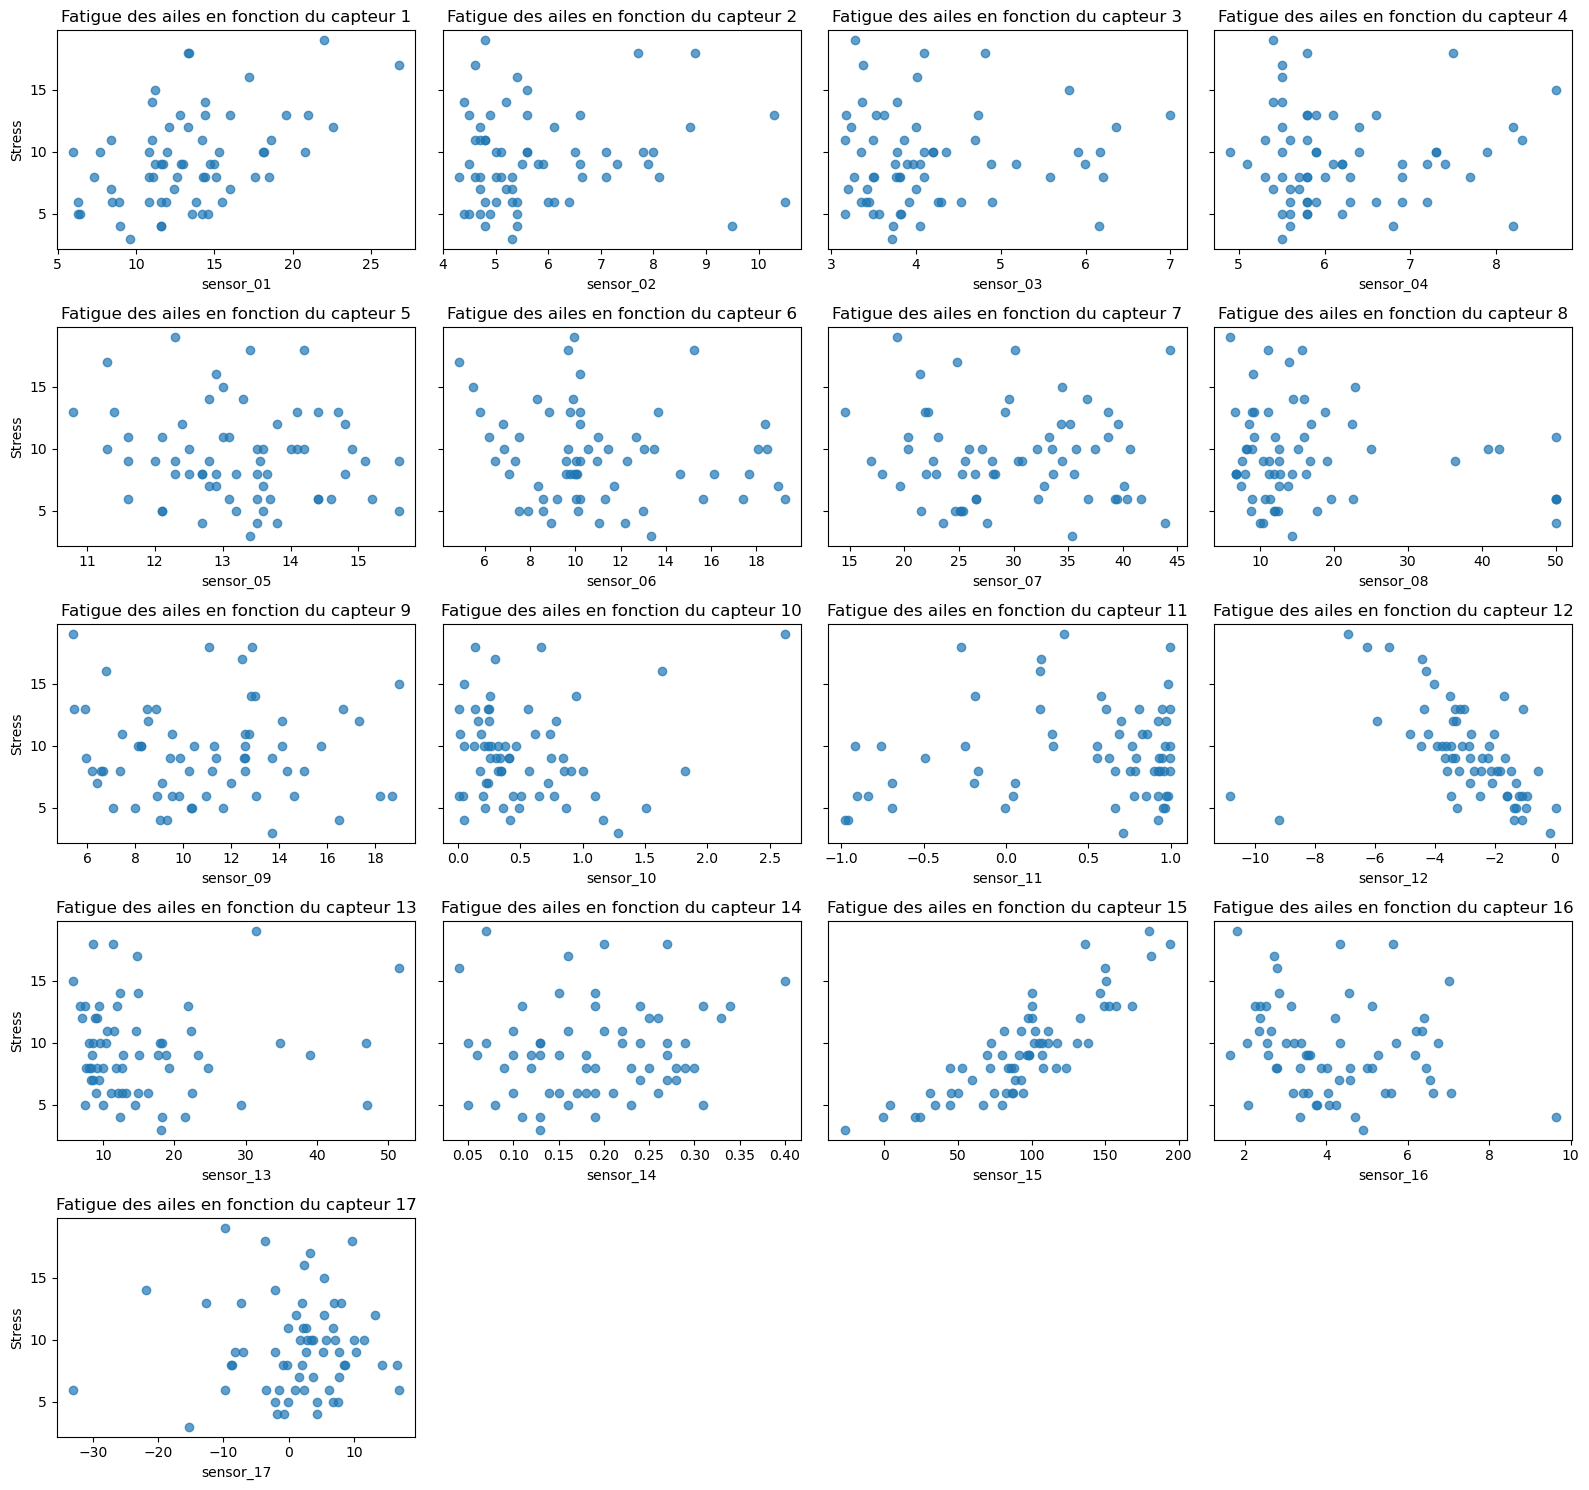

In [12]:
n,p = np.shape(X)

n_cols = 4                  # 4 plots par ligne
n_rows = (p + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), sharey=True)
axes = axes.flatten()  # transformer en liste pour itérer facilement

for i in range(p):
    axes[i].scatter(X.iloc[:, i], Y, alpha=0.7)
    axes[i].set_xlabel(X.columns[i])
    if i % n_cols == 0:
        axes[i].set_ylabel("Stress")
    axes[i].set_title(f"Fatigue des ailes en fonction du capteur {i+1}")

# désactiver les axes vides si le nombre de colonnes n'est pas multiple de 4
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<span style="color:lightblue">
En observant les valeurs de fatigue des ailes de l'avion en fonction des valeurs affichées par chaque capteur, on remarque que seuls certains capteurs semblent être corrélés à la fatigue.  
Le capteur 15 semble étroitement lié à la fatigue des ailes, par une relation linéaire de pente positive. A un degré moindre, c'est également le cas du capteur n°1, et du capteur n°12 (cette fois-ci la relation est affine de pente négative), même s'il présente 2 valeurs aberrantes.  
Il paraît donc logique de concentrer nos recherches autour de ces 3 capteurs par la suite. </span>


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


R² : 0.22101879866785268
MSE : 10.552760961796434


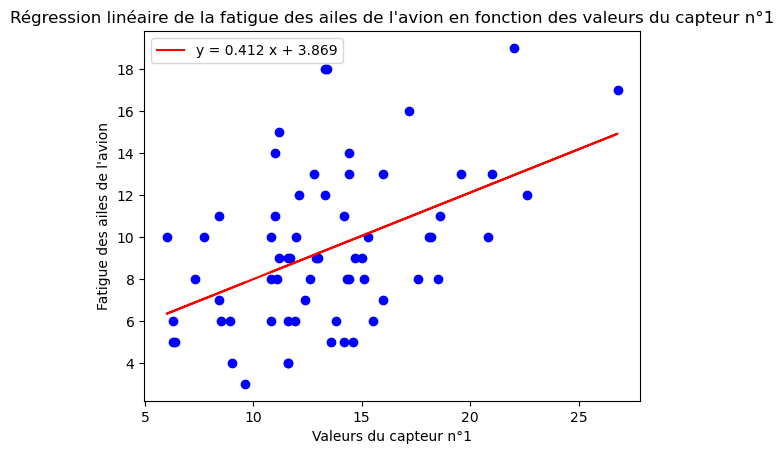

R² : 0.16593091202784893
MSE : 11.299029676122734


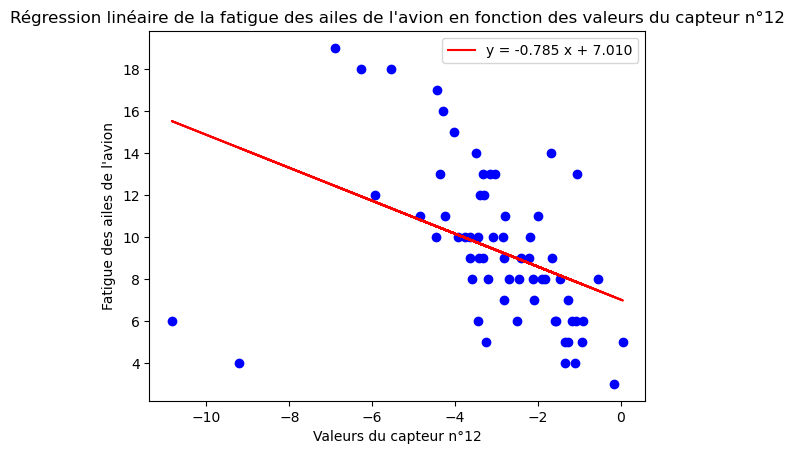

R² : 0.7149948392614085
MSE : 3.860929286880607


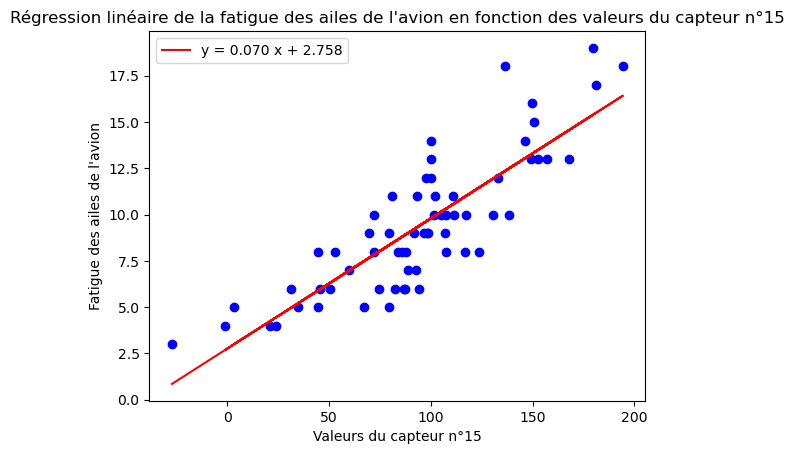

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

selected_sensors = [1,12,15]

for sensor in selected_sensors :
    lr_sensor = LinearRegression()

    x_sensor = np.array(X.iloc[:,sensor-1]).reshape(-1,1)

    lr_sensor.fit(x_sensor,Y)

    y_pred_sensor = lr_sensor.predict(x_sensor)

    print("R² :", r2_score(Y, y_pred_sensor))

    # Autres métriques
    print("MSE :", mean_squared_error(Y, y_pred_sensor))

    plt.figure()
    plt.scatter(x_sensor,Y,color='blue')
    plt.plot(x_sensor,y_pred_sensor,color='red', label=f"y = {lr_sensor.coef_[0][0]:.3f} x + {lr_sensor.intercept_[0]:.3f}")
    plt.title(f"Régression linéaire de la fatigue des ailes de l'avion en fonction des valeurs du capteur n°{sensor}")
    plt.xlabel(f"Valeurs du capteur n°{sensor}")
    plt.ylabel(f"Fatigue des ailes de l'avion")
    plt.legend()
    plt.show()

<span style="color:lightblue">
Question 2.2.1 :
En affichant la régression linéaire entre chacun des capteurs considérés et le niveau de stress, on s'aperçoit tout de même que pour les capteurs 1 et 12, la régression est de faible qualité (le R² y est très faible). Pour le capteur 12, on peut expliquer cela en bonne partie par la présence des 2 valeurs aberrantes à faible fatigue et faible valeur du capteur.  
Pour ce qui est du capteur 15, le R² est à 0.71, et la MSE bien plus faible que dans les autres cas, la régression est donc plus satisfaisante, même si elle n'est pas parfaite.  
Pour évaluer ce modèle, on pourrait utiliser une méthode de K-Folds pour valider (ou non) la pertinence d'estimer la fatigue des ailes de l'avion à partir de ces 3 capteurs individuellement. </span>

<span style="color:lightblue">
Question 2.2.2 :  
On va procéder à un test de Student pour vérifier s'il est cohérent d'estimer qu'il existe un lien linéaire entre les valeurs de chacun des 3 capteurs, et le niveau de fatigue des ailes de l'avion.  
Dans chaque cas, l'hypothèse nulle est donc $H_0 : \beta_{1} = 0$, i.e. il n'y a pas de lien linéaire significatif entre le capteur en question et la fatigue. On va alors regarder les p-values obtenues dans le cadre du test. Si elles sont inférieures à 0.05, on pourra rejeter $H_0$, et donc estimer qu'il existe une relation significative entre le capteur et la fatigue, et sinon on pourra retenir $H_0$. </span>

In [14]:
import statsmodels.api as sm

for col in [1,12,15]:
    Xi = X.iloc[:,col-1].values
    Xi = sm.add_constant(Xi)  # ajoute intercept
    model = sm.OLS(Y, Xi).fit()
    print(f"\n=== Régression Stress ~ {col} ===")
    print(model.summary())



=== Régression Stress ~ 1 ===
                            OLS Regression Results                            
Dep. Variable:                 Stress   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     17.59
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           8.87e-05
Time:                        18:26:58   Log-Likelihood:                -166.22
No. Observations:                  64   AIC:                             336.4
Df Residuals:                      62   BIC:                             340.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8693

<span style="color:lightblue">
On s'aperçoit que dans chacun des cas, la p-value est inférieure à 0.05, on peut donc rejeter H0 dans les 3 cas, et estimer qu'il existe une relation linéaire significative entre chacun des 3 capteurs, et la fatigue des ailes de l'avion. </span>


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


<span style="color:lightblue">
Question 2.3.1 : Pour commencer, on peut tenter de détecter visuellement les données aberrantes en affichant un nuage de points des données en fonction du capteur n°12.  
Ensuite, on peut calculer la moyenne et l'écart-type des données obtenues par ce capteur, et calculer le Z-Score pour chaque point (l'écart aux valeurs standardisées), pour détecter les points qui s'écartent trop de la moyenne. Ceux qui ont un Z-Score supérieur à 3 peuvent être considérés comme aberrants.
</span> 

In [15]:
from scipy import stats

z_scores = np.abs(stats.zscore(X['sensor_12']))
outliers = X[z_scores > 3]
print(f"Moyenne des valeurs du capteur n°12 : {np.mean(X['sensor_12'])}")
print(outliers)

Moyenne des valeurs du capteur n°12 : -3.0119275270312498
    sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_06  \
2        10.8        6.1       4.26        6.6       14.6      15.64   
62        9.0        4.8       3.73        5.6       12.7      12.22   

    sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  sensor_12  \
2       32.20       8.93   8.926667       0.44     -0.903 -10.828537   
62      27.59       9.96   9.013333       1.16     -0.979  -9.210272   

    sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  
2       13.23       0.17  82.606835       3.18      -1.53  
62      21.53       0.11  20.959932       4.71      -0.79  


<span style="color:lightblue">
On remarque bien la présence des 2 outliers dans les données du capteur n°12, ayant une valeur de -10.82 et -9.21 respectivement, alors que la moyenne des valeurs du capteur est de -3.01.  
Si l'on suppose que les erreurs de prédiction suivent une loi normale centrée, on peut également procéder à un test de Student pour détecter les outliers.
</span>

<span style="color:lightblue">
L'hypothèse H0 est ici que le résidu est sensiblement proche de 0, et on va utiliser la statistique du test de Student pour l'accepter ou la rejeter. Si la statistique de test est supérieure au seuil de confiance à 95% (en valeur absolue), on rejette H0, et on peut alors estimer que le point considéré est un outlier.
</span>

In [24]:
model = sm.OLS(Y, X['sensor_12']).fit()

residuals = model.resid
sigma = residuals.std(ddof=X.shape[1])

# seuil pour test bilatéral à 5%, puisque pour une normale standard, 95% des valeurs sont dans [-1.96, 1.96].
threshold = 1.96
t = np.abs(residuals / sigma)
outliers = np.where(t > threshold)[0]

print("Indices des outliers détectés :", outliers)


Indices des outliers détectés : [ 2 62]



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?



<span style='color:lightblue'>
Question 2.4.1 : il vaut mieux centrer les données car sinon, le processus de régularisation risque de fausser la valeur de beta_0 (l'ordonnée à l'origine de notre régression), et les réduire car les données ne sont pas nécessairement à la même échelle (typiquement ici on ne sait pas ce que représentent les capteurs).
</span>

<span style='color:lightblue'>
Question 2.4.2 : On va donc effectuer une régression linéaire régularisée. On choisit d'utiliser la méthode Lasso. Pour ce faire, il nous faut d'abord trouver le alpha optimal à utiliser dans la méthode. On va donc procéder à une cross-validation KFold, sur différentes valeurs de alpha, afin de trouver celle qui minimise la MSE. Une fois que ce sera fait, on pourra alors créer notre modèle Lasso optimal (avec la bonne valeur de alpha), et regarder quelles variables explicatives ont un coefficient non nul dans la régression. On calculera également la MSE ou le R² pour évaluer la pertinence du modèle obtenu.
</span>

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

X = pd.read_csv('./E2_sensor_vals.csv', sep=';', decimal = '.')

Y = pd.read_csv('./E2_stress_vals.csv', sep=';', decimal = '.')

# On enlève les 2 valeurs aberrantes du jeu de données
indices_to_drop = outliers

X.drop(indices_to_drop, inplace=True)
Y.drop(indices_to_drop, inplace=True)

# On centre et réduit le jeu de données
X = (X - X.mean()) / X.std()

Y = (Y - Y.mean()) / Y.std()

# On procède à la méthode de validation croisée KFold pour trouver le alpha optimal
kf = KFold(n_splits=8, shuffle=True, random_state=42)
list_alpha = np.linspace(0.001,0.99,100)
mean_mse_par_alpha = []

for alpha in list_alpha :
    # Pour chaque alpha considéré, on va construire un modèle Lasso, en distinguant
    # un ensemble d'entraînement (ici 7/8e du jeu de données) et un ensemble de test (le dernier 1/8e)
    mse_scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        # Pour chaque combinaison entraînement/test, on établit le modèle Lasso avec le alpha considéré
        model = Lasso(alpha=alpha, max_iter=10000)
        model.fit(X_train, y_train)
        
        # On calcule la MSE du modèle
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    
    # Pour chaque alpha, on fait la moyenne des MSE obtenus lors de la réalisation de la méthode KFold
    mean_mse = np.mean(mse_scores)
    mean_mse_par_alpha.append(mean_mse)

# Sélection du meilleur alpha, i.e. celui qui minimise la MSE
best_alpha = list_alpha[np.argmin(mean_mse_par_alpha)]
print("\nMeilleur alpha =", best_alpha)

# On construit finalement le modèle Lasso optimal avec le alpha choisi
best_model = Lasso(alpha=best_alpha, max_iter=10000)
best_model.fit(X,Y)

# On estime alors les valeurs de Y à partir du modèle, et on calcule la MSE et le R² pour 
# estimer la pertinence du modèle
Y_pred = best_model.predict(X)
mse_score_lasso = mean_squared_error(Y, Y_pred)
r2 = best_model.score(X, Y)
print("R² :", r2)

print("MSE :", mse_score_lasso)
print("Coefficients du modèle Lasso optimal :",best_model.coef_)



Meilleur alpha = 0.08091919191919192
R² : 0.8046046932390142
MSE : 0.1922437695551635
Coefficients du modèle Lasso optimal : [ 0.02998618 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.3321421
 -0.          0.          0.55567648 -0.         -0.        ]


<span style='color:lightblue'>
On remarque ainsi que les 3 seuls capteurs pour lesquels le coefficient dans la régression est non nul, sont les capteurs 1, 12 et 15. Cela corrobore ce que l'on avait remarqué dans les questions précédentes, à savoir que ce sont les seuls qui semblent avoir une corrélation avec le niveau de fatigue dans les ailes de l'avion. Le R² est de 0.8, ce qui est plutôt satisfaisant, et la MSE de 0.19. On peut en conclure que l'utilisation des données des capteurs, en enlevant les outliers, paraît fiable pour estimer le niveau de fatigue des ailes de l'avion.
</span>

<span style='color:lightblue'>
Question 2.4.3 : Etant donné qu'il y a deux valeurs aberrantes dans notre jeu de données, mais qu'elles existent tout de même, il pourrait être pertinent de répéter le même processus avec la méthode Lasso, mais en gardant les outliers, et de comparer alors, les coefficients de la régression (et les variables pour lesquelles ils sont non nuls), le R² et la MSE, pour voir si l'étude de ce jeu de données est sensible ou non à la présence de ces outliers.
</span>

In [29]:
X = pd.read_csv('./E2_sensor_vals.csv', sep=';', decimal = '.')

Y = pd.read_csv('./E2_stress_vals.csv', sep=';', decimal = '.')

X = (X - X.mean()) / X.std()

Y = (Y - Y.mean()) / Y.std()

kf = KFold(n_splits=8, shuffle=True, random_state=42)
list_alpha = np.linspace(0.001,0.99,100)
mean_mse_par_alpha = []

for alpha in list_alpha :
    mse_scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx,:], X.iloc[test_idx,:]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        model = Lasso(alpha=alpha, max_iter=10000)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    
    mean_mse = np.mean(mse_scores)
    mean_mse_par_alpha.append(mean_mse)

# Sélection du meilleur alpha
best_alpha = list_alpha[np.argmin(mean_mse_par_alpha)]
print("\nMeilleur alpha =", best_alpha)

best_model = Lasso(alpha=best_alpha, max_iter=10000)
best_model.fit(X,Y)

Y_pred = best_model.predict(X)
mse_score_lasso = mean_squared_error(Y, Y_pred)
r2 = best_model.score(X, Y)
print("R² :", r2)

print("MSE :", mse_score_lasso)
print("Coefficients du modèle Lasso optimal :",best_model.coef_)


Meilleur alpha = 0.1008989898989899
R² : 0.7307241091726875
MSE : 0.26506845503313575
Coefficients du modèle Lasso optimal : [ 0.06296452 -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.07406197
 -0.          0.          0.69288796 -0.         -0.        ]


<span style='color:lightblue'>
Le R² est cette fois-ci de 0.73, donc il a diminué mais reste pas trop mauvais, ce qui démontre que l'on dispose tout de même d'assez de données significatives pour pallier à la présence de valeurs aberrantes. Ces valeurs intervenant sur le capteur 12, on s'aperçoit que son influence dans la régression devient plus négligeable, puisque les 2 outliers viennent fausser son coefficient.
</span>